# Scikit-Learn Tutorial

Ottimo [paper](https://dtai.cs.kuleuven.be/events/lml2013/papers/lml2013_api_sklearn.pdf) che descrive l'architettura dell'API di Scikit-earn


In [91]:
from sklearn import neighbors, datasets
from sklearn.base import is_classifier
from sklearn.model_selection import StratifiedShuffleSplit, ShuffleSplit, StratifiedKFold, train_test_split, GridSearchCV
from sklearn.metrics import plot_confusion_matrix, accuracy_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from joblib import dump, load
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

import pandas as pd

import numpy as np

<img src="imgs\Estimators.png"  width="700">

[Iris dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)

Le 4 features sono lunghezza e larghezza del **sepalo** e del **petalo**

<img src="imgs\sepalo_petalo.png"  width="300">

In [92]:
iris = datasets.load_iris()
X, y = iris.data, iris.target

species = ['Iris setosa', 'Iris versicolor', 'Iris virginica']
features = ['sepal_len', 'sepal_width', 'petal_len', 'petal_width']

In [93]:
len(X)

150

In [94]:
X[:10], y[:10]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [95]:
# stesso numero di sample per ogni specie
[list(y).count(i) for i in [0, 1, 2]]

[50, 50, 50]

## Classifictori

In [96]:
# stratify permette di ottenere nel train e nel test la stessa distribuzione di calssi dell'intero Datatset
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True, stratify=y)

In [97]:
# classificazione basata sui primi vicini secondo la distanza Euclidea
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html?highlight=kneighborsclassifier#sklearn.neighbors.KNeighborsClassifier
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

# lo stimatore è un classificatore?
is_classifier(knn)

True

In [98]:
# dizionario con i parametri del modello
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [99]:
# è possibile modificare i parametri dopo la creazione dello stimatore
knn.set_params(p=2)

KNeighborsClassifier()

In [100]:
# fit del modello
knn.fit(train_X, train_y)

KNeighborsClassifier()

In [101]:
knn.score(test_X, test_y)

1.0

In [102]:
# come sopra utilizzando una metrica (in questo caso la stessa di quella di default)
pred_test_y = knn.predict(test_X)
accuracy_score(test_y, pred_test_y)

1.0

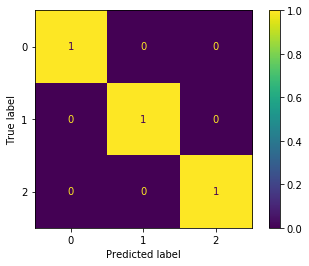

In [103]:
plot_confusion_matrix(knn, test_X, test_y, normalize='true')

## Regressori

In [104]:
d = datasets.load_boston()

In [105]:
X, y = d['data'], d['target']

In [106]:
np.count_nonzero(np.isnan(d['data']))

0

In [107]:
reg = LinearRegression()
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

In [108]:
reg.fit(train_X, train_y)

LinearRegression()

In [109]:
reg.coef_

array([-1.19443447e-01,  4.47799511e-02,  5.48526168e-03,  2.34080361e+00,
       -1.61236043e+01,  3.70870901e+00, -3.12108178e-03, -1.38639737e+00,
        2.44178327e-01, -1.09896366e-02, -1.04592119e+00,  8.11010693e-03,
       -4.92792725e-01])

In [110]:
reg.intercept_

38.09169492630246

In [111]:
reg.n_features_in_

13

In [112]:
reg.score(test_X, test_y)

0.5892223849182507

In [113]:
y_true = test_y
y_pred = reg.predict(test_X)
mean_absolute_error(y_true, y_pred)

3.842909220444498

## Trasformatori

In [114]:
scaler = StandardScaler()
scaler.fit(train_X)

StandardScaler()

In [115]:
transf = scaler.transform(train_X)

In [116]:
inv_trans = scaler.inverse_transform(transf)

## Salvare il modello

https://joblib.readthedocs.io/en/latest/persistence.html

*joblib.dump* and *joblib.load* provide a replacement for pickle to work efficiently on arbitrary Python objects containing large data, in particular large numpy arrays.

Si può anche usare **pickle**

In [117]:
dump(knn, 'filename.joblib')

['filename.joblib']

In [118]:
knn = load('filename.joblib')

## Score

Estimator score method: Estimators have a **score method** providing a default evaluation criterion for the problem they are designed to solve. This is not discussed on this page, but in each estimator’s documentation

## Pipeline

Sequentially apply a list of transforms and a final estimator. Intermediate steps of pipeline must implement **fit** and **transform** methods and the final estimator only needs to implement **fit**.

In [121]:
iris = datasets.load_iris()
X, y = iris.data, iris.target

In [122]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

In [123]:
pipeline = Pipeline([('scaler', StandardScaler()), ('SVM', SVC())])

In [124]:
pipeline.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()), ('SVM', SVC())])

In [125]:
pipeline.score(test_X, test_y)

1.0

In [127]:
pipeline['scaler'], pipeline['SVM']

(StandardScaler(), SVC())

## Grid search

In [148]:
params = {'SVM__C': 10**np.linspace(-3, 3, 10)}

In [151]:
grid = GridSearchCV(pipeline, param_grid=params, cv=5, verbose=1)

In [152]:
grid.fit(train_X, train_y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVM', SVC())]),
             param_grid={'SVM__C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])},
             verbose=1)

# Uso avanzato delle pipeline con Grid search

In [173]:
pipeline = Pipeline([('scaler', StandardScaler()), ('classifier', SVC())])

In [181]:
params=[
    {
        'classifier':[SVC()],
        'classifier__C':10**np.linspace(-3, 3, 10)},
    {
        'classifier': [neighbors.KNeighborsClassifier()],
        'classifier__n_neighbors': range(1, 10)
    }
]

In [182]:
grid = GridSearchCV(pipeline, param_grid=params, cv=5, verbose=1)

In [183]:
grid.fit(train_X, train_y)

Fitting 5 folds for each of 19 candidates, totalling 95 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    0.4s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid=[{'classifier': [SVC()],
                          'classifier__C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])},
                         {'classifier': [KNeighborsClassifier(n_neighbors=6)],
                          'classifier__n_neighbors': range(1, 10)}],
             verbose=1)

In [184]:
grid.cv_results_['params']

[{'classifier': SVC(), 'classifier__C': 0.001},
 {'classifier': SVC(), 'classifier__C': 0.004641588833612777},
 {'classifier': SVC(), 'classifier__C': 0.021544346900318832},
 {'classifier': SVC(), 'classifier__C': 0.1},
 {'classifier': SVC(), 'classifier__C': 0.46415888336127775},
 {'classifier': SVC(), 'classifier__C': 2.154434690031882},
 {'classifier': SVC(), 'classifier__C': 10.0},
 {'classifier': SVC(), 'classifier__C': 46.41588833612773},
 {'classifier': SVC(), 'classifier__C': 215.44346900318823},
 {'classifier': SVC(), 'classifier__C': 1000.0},
 {'classifier': KNeighborsClassifier(n_neighbors=6),
  'classifier__n_neighbors': 1},
 {'classifier': KNeighborsClassifier(n_neighbors=6),
  'classifier__n_neighbors': 2},
 {'classifier': KNeighborsClassifier(n_neighbors=6),
  'classifier__n_neighbors': 3},
 {'classifier': KNeighborsClassifier(n_neighbors=6),
  'classifier__n_neighbors': 4},
 {'classifier': KNeighborsClassifier(n_neighbors=6),
  'classifier__n_neighbors': 5},
 {'classifi